In [52]:
from glob import glob
from os import path
from pandas import read_csv, concat
from csv import writer



In [53]:
#load data
folder_path = './csv/'

golf_files = glob(path.join(folder_path, 'golf?.csv'))

bat_files = glob(path.join(folder_path,'bat?.csv'))

df_golf = concat((read_csv(f,header=0) for f in golf_files),ignore_index=True)

df_bat = concat((read_csv(f,header=0) for f in bat_files),ignore_index=True)

df_golf.fillna(0, inplace=True)

df_bat.fillna(0,inplace=True)

#df_golf = dataframe.values

In [54]:
print(df_golf.shape)
print(df_bat.shape)

(626, 4)
(214, 4)


In [55]:
df_golf.head(),df_bat.head()

(       time     X_value       Y_value   Z_value
 0  Started:  8월 19 2019  15:06:36:902          
 1    0.0000     0.00000       0.00000   0.00000
 2    0.0030    -0.17909      -0.15016  -0.11115
 3    0.0446     0.17801      -0.11336   0.67382
 4    0.0854    -0.31890      -0.06111   0.24877,
        time     X_value       Y_value   Z_value
 0  Started:  8월 19 2019  15:17:00:489          
 1    0.0000     0.00000       0.00000   0.00000
 2    0.0058    -0.05916       0.15918  -0.43768
 3    0.0467    -0.17029       0.09638  -0.48570
 4    0.0889    -0.10369       0.11444  -0.31798)

In [56]:
df_golf.info(),df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 4 columns):
time       626 non-null object
X_value    626 non-null object
Y_value    626 non-null object
Z_value    626 non-null object
dtypes: object(4)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
time       214 non-null object
X_value    214 non-null object
Y_value    214 non-null object
Z_value    214 non-null object
dtypes: object(4)
memory usage: 6.8+ KB


(None, None)

In [57]:
import numpy as np
import matplotlib as plt

timestamp = np.linspace(0,6,30)
timestamp

array([0.        , 0.20689655, 0.4137931 , 0.62068966, 0.82758621,
       1.03448276, 1.24137931, 1.44827586, 1.65517241, 1.86206897,
       2.06896552, 2.27586207, 2.48275862, 2.68965517, 2.89655172,
       3.10344828, 3.31034483, 3.51724138, 3.72413793, 3.93103448,
       4.13793103, 4.34482759, 4.55172414, 4.75862069, 4.96551724,
       5.17241379, 5.37931034, 5.5862069 , 5.79310345, 6.        ])

In [65]:
for x in df_golf['time']:
    if x=='Started:':
        print(x)

Started:
Started:
Started:
Started:
Started:


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
def resizedataseq(df,):
    Qx = list(df.iloc[:,0])
    Qy = list(df.iloc[:,1])
    Qz = list(df.iloc[:,2])

    seqlen = len(df)
    
    while seqlen != 120:
        mx = np.mean(Qx)
        my = np.mean(Qy)
        mz = np.mean(Qz)

        if seqlen <120:
            Qx.pop(0)
            Qy.pop(0)
            Qz.pop(0)
            Qx.append(mx)
            Qy.append(my)
            Qz.append(mz)
            #행추가
            df.loc[seqlen]=[mx,my,mz]
            seqlen = seqlen+1
        
        
        elif seqlen > 120:
            #행삭제
            df = df.iloc[:121,:]
            seqlen = 120
            break
            
        
    return df

time       2.638500
X_value    5.048469
Y_value   -5.274066
Z_value    2.737568
dtype: float64
      X_value   Y_value   Z_value
1     0.00000   0.00000   0.00000
2    -0.05916   0.15918  -0.43768
3    -0.17029   0.09638  -0.48570
4    -0.10369   0.11444  -0.31798
5    -0.07467   0.18640  -0.36741
..        ...       ...       ...
129   4.75198  -1.49400   2.39574
130   4.72406  -2.23556   2.51714
131   4.89727  -2.64750   2.50230
132   4.70497  -3.07137   2.47574
133   4.45040  -3.30456   2.56422

[133 rows x 3 columns]
       time  X_value  Y_value  Z_value
2    0.0030 -0.17909 -0.15016 -0.11115
3    0.0446  0.17801 -0.11336  0.67382
4    0.0854 -0.31890 -0.06111  0.24877
5    0.1246 -0.10264 -0.20874 -0.83756
6    0.1660 -0.18509 -0.26998 -1.04321
..      ...      ...      ...      ...
129  5.1112  0.06006  0.01913  3.41351
130  5.1510 -0.17541 -0.13363  3.00818
131  5.1905 -0.30748 -0.21351  2.68463
132  5.2300 -0.30407 -0.29684  2.26684
133  5.2699 -0.41958 -0.41178  2.03182

[132

Text(0.5, 1.0, 'golf')

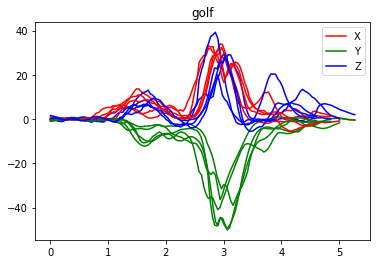

In [76]:
golf_label = "golf"

golf_dataset = []
start = 1
end = 0


for i in range(1,len(df_golf)):
    if i==len(df_golf)-1:
        end = i
        subset = df_golf[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
        
    
    if df_golf['time'][i] == 'Started:':
        end = i-1
        #print(df_golf[start:end][1:].astype(float))
        subset = df_golf[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
        print(df_bat.iloc[start:end,1:])
        #subset= df_bat.iloc[start:end,1:].astype(float)
        #subset = resizedataseq(subset)
        print(subset)
        start = i+1 
    
        
plt.legend(['X','Y','Z'])
plt.title("golf")
        
    
        
        #df = df.drop(i) #float으로 형변환이 불가능한 

time       2.305031
X_value    5.572535
Y_value   -9.221043
Z_value    3.843399
dtype: float64
(119, 3)
time       2.303966
X_value    5.505570
Y_value   -5.966436
Z_value    4.308702
dtype: float64


Text(0.5, 1.0, 'bat')

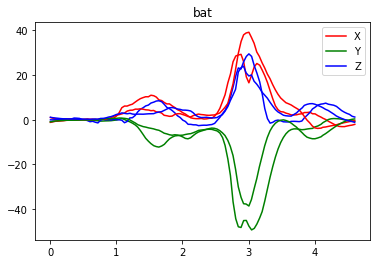

In [74]:

bat_dataset = []
start = 1
end = 0


for i in range(1,len(df_bat)):
    if i==len(df_bat)-1:
        end = i
        subset = df_bat[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
            
    
    if df_bat['time'][i] == 'Started:':
        end = i-1
        #print(df_golf[start:end][1:].astype(float))
        #subset = df_bat[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
        subset= df_bat.iloc[start:end,1:].astype(float)
        resizedataseq(subset)
        subset = subset.values
        print(subset.shape)
        start = i+1 
        
plt.legend(['X','Y','Z'])
plt.title("bat")
        

##  주어진 데이터로는 두 스윙간의 차이를 구분하기 어려움.